In [1]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import umap
import os

/home/max/miniconda3/envs/tf-wsl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-12 20:09:23.578635: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
encoded_mean_no_p_df = pd.read_csv("./data/var_autoencoder/encoded_mean_all_samples_no_p.csv")
encoded_mean_no_p_np = encoded_mean_no_p_df.iloc[:, :-4].to_numpy()
pop_labels_no_p = encoded_mean_no_p_df["pop"]
scaled_means_no_p = StandardScaler().fit_transform(encoded_mean_no_p_np)

encoded_mean_no_deco_p_df = pd.read_csv("./data/var_autoencoder/encoded_mean_all_samples_no_deco_p.csv")
encoded_mean_no_deco_p_np = encoded_mean_no_deco_p_df.iloc[:, :-4].to_numpy()
pop_labels_no_deco_p = encoded_mean_no_deco_p_df["pop"]
scaled_means_no_deco_p = StandardScaler().fit_transform(encoded_mean_no_deco_p_np)

encoded_mean_df = pd.read_csv("./data/var_autoencoder/encoded_mean_all_samples.csv")
encoded_mean_np = encoded_mean_df.iloc[:, :-4].to_numpy()
pop_labels = encoded_mean_df["pop"]
scaled_means = StandardScaler().fit_transform(encoded_mean_np)

In [5]:
pca = PCA(n_components=2)
embeded_means = pca.fit_transform(scaled_means)

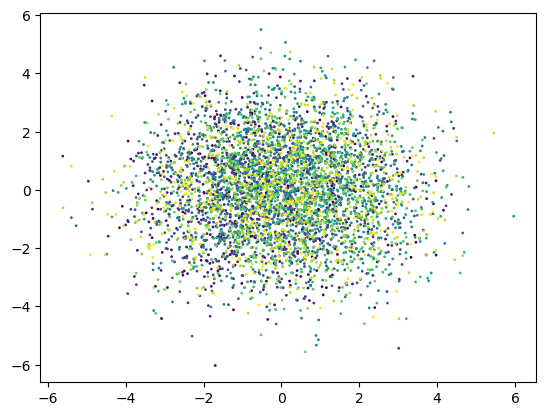

In [6]:
fig, axs = plt.subplots()
axs.scatter(embeded_means[:, 0], embeded_means[:, 1], c= pop_labels,
            s = 1)


In [8]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_means)
reducer2 = umap.UMAP()
no_p_embedding = reducer2.fit_transform(scaled_means_no_p)
reducer3 = umap.UMAP()
no_deco_p_embedding = reducer3.fit_transform(scaled_means_no_deco_p)

Text(0.5, 1.0, 'UMAP projection of mean embedding (parent reconstruction)')

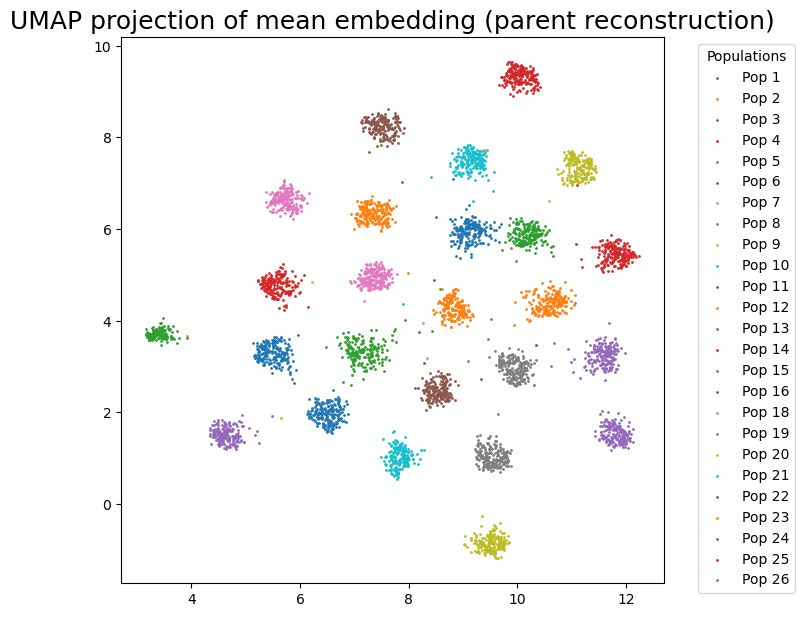

In [27]:
unique_labels = np.unique(pop_labels)
plt.figure(figsize=(6, 6))
for label in unique_labels:
    indices = pop_labels == label
    plt.scatter(embedding[indices, 0], embedding[indices, 1], s=1, label=f'Pop {label}')

plt.tight_layout()
plt.legend(title='Populations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('UMAP projection of mean embedding (parent reconstruction)', fontsize=18)

Text(0.5, 1.0, 'UMAP projection of mean embedding (no decoder parents)')

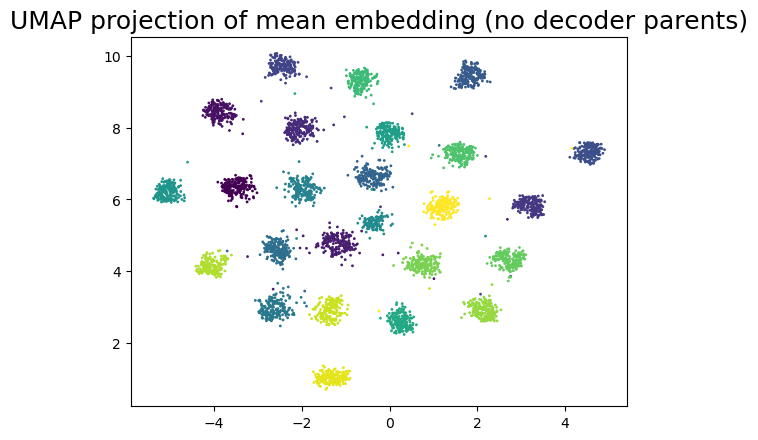

In [12]:
plt.scatter(
    no_deco_p_embedding[:, 0],
    no_deco_p_embedding[:, 1],
    c=pop_labels_no_p,
    s=1)
plt.title('UMAP projection of mean embedding (no decoder parents)', fontsize=18)

Text(0.5, 1.0, 'UMAP projection of mean embedding (no decoder parents)')

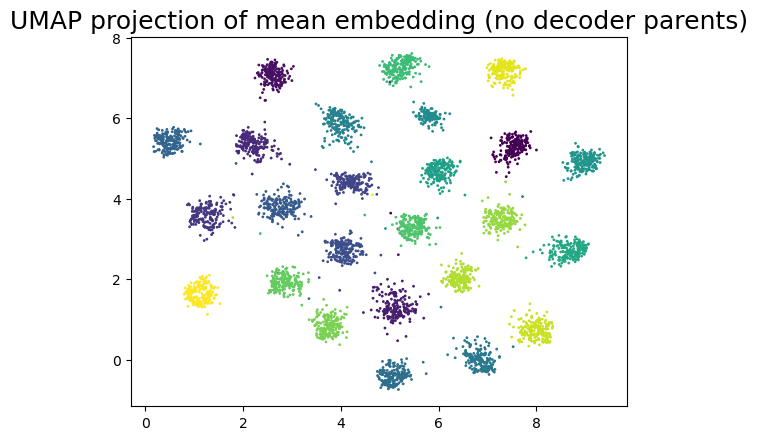

In [13]:
plt.scatter(
    no_p_embedding[:, 0],
    no_p_embedding[:, 1],
    c=pop_labels_no_p,
    s=1)
plt.title('UMAP projection of mean embedding (no decoder parents)', fontsize=18)